In [1]:
import config
import torch
import sys
sys.path.append('../util')
sys.path.append('../others_networks')
import time
from Trainer import MulticlassTrainer
from util import measure_inference_speed, count_trainable_parameters
from DatasetReader import *

from UNext import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
result_path = './UNext/'

/home/alan/miniconda3/envs/pytorch5070/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/alan/miniconda3/envs/pytorch5070/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [2]:
# from util import compile_xls_best_results
# compile_xls_best_results(result_path, output_file="unext.xlsx")

In [3]:
num_classes = config.num_classes
in_channels = config.in_channels

train_loader, test_loader, val_loader = get_datasets(dataset_dir=config.dataset_path, 
                                              resolution=config.dataset_resolution, 
                                              batch_size=config.batch_size)

torch.Size([16, 3, 256, 256]) torch.Size([16, 1, 256, 256])


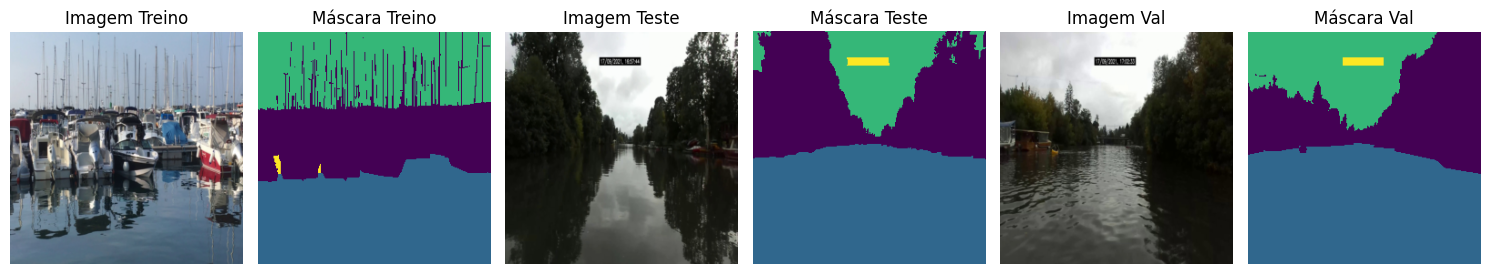

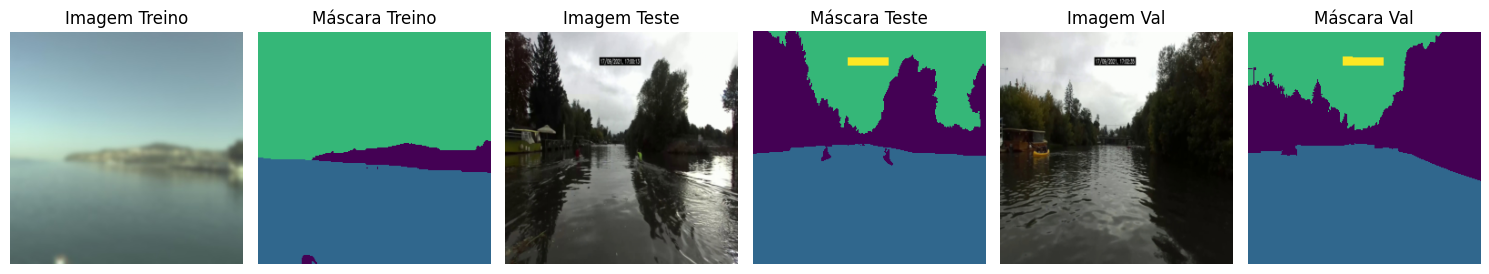

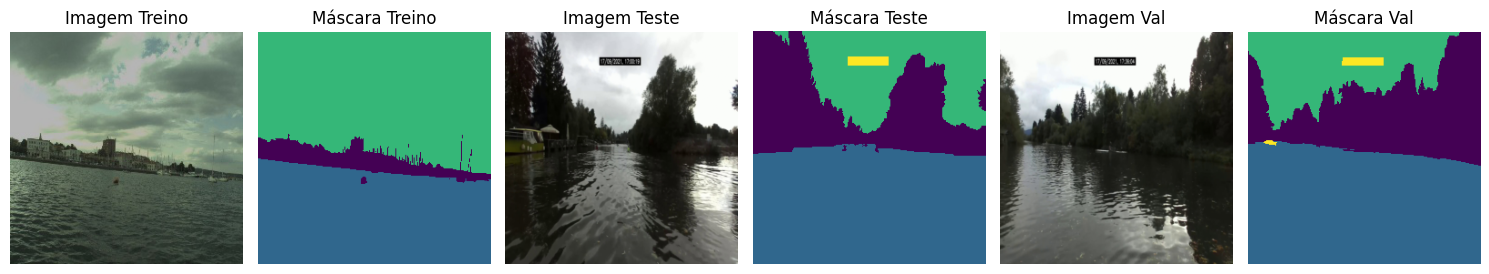

In [4]:
for (images_train, masks_train), (images_test, masks_test) in zip(train_loader, test_loader):
    print(images_train.shape, masks_train.shape)
    break

show_dataset_prev(train_loader, test_loader, val_loader, num_images=3, num_classes=config.num_classes)

In [5]:
def train(model, model_name):
    epochs = 300
    model_filename = f'{model_name}-epochs{epochs}.pth'
    trainer = MulticlassTrainer(num_classes=config.num_classes,
                    model_filename=model_filename,
                    model_dir=result_path, 
                    info={'weights':'DEFAULT'},
                    save_xlsx=True)
    model = trainer.train(model, train_loader, val_loader, test_loader,
                            num_epochs=epochs, 
                            save_every=1, 
                            continue_from_last=True,
                            learning_rate=1e-3,
                            verbose=1)
    model.to(device)


In [ ]:
model = UNext(input_channels=in_channels, num_classes=num_classes, img_size=config.dataset_resolution)
train(model,'UNext-1')

In [ ]:
model = UNext(input_channels=in_channels, num_classes=num_classes, img_size=config.dataset_resolution)
train(model,'UNext-2')

In [ ]:
model = UNext(input_channels=in_channels, num_classes=num_classes, img_size=config.dataset_resolution)
train(model,'UNext-3')